<a href="https://www.kaggle.com/code/paragghatage/model-training?scriptVersionId=257990005" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## testing Linear Regression Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

# np.random.rand(100,3) creates an array of size(100 by 3) and popultes it with random values from 0 to 1.

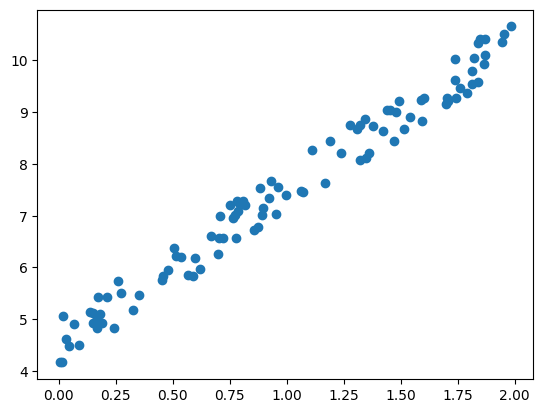

In [3]:
plt.scatter(X,y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

# .c_ concatinates 2 given vectors, .ones() function create a vector of given size containing all 1s

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.54994226],
       [2.93812254]])

## so, This method will find optimal solution in 1 shot calculation,
## but, it will be computationally expensive ,more memory requirement

# Gradient Descent- 
## iteratively finds optimal solution (minimizing cost function)

In [6]:
eta = 0.1 # learning raten_iterations = 1000
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initializationfor iteration in range(n_iterations):
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.54994226],
       [2.93812254]])

## Stocastic gradient descent:
choose 1 instance of training set randomly and calculate gradient.
Decrease learning rate gradually.
This will instead of calculating gradient for an entire batch at a time, it will calculate and update it for each instance till entire data is parsed.

In [7]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparametersdef learning_schedule(t):return t0 / (t + t1)
theta = np.random.randn(2,1) # random initializationfor epoch in range(n_epochs):for i in range(m):

def learning_schedule(t):
    return t0 / (t + t1)

m = 100

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.52906185],
       [2.93846458]])

The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3). It starts with a learning rate
of 0.1 (eta0=0.1), using the default learning schedule.

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 1000, tol = 1e-3,penalty= None, eta0 = 0.1)

sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.55928575]), array([2.97411798]))